In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px
import pycountry

: 

# Data Preparation

In [ ]:
df1 = pd.read_csv('../datasets/clean_countries_renewables_1985_2021.csv')
df2 = pd.read_csv('../datsets/country_targetshare_perce.csv')
df3 = pd.read_csv('../datasets/Sustainable.csv')
#First Dataset Check
null_counts = df1.isnull().sum()
print("First File \nNull values per column:\n", null_counts)
non_null_counts = df1.notnull().sum()
print("Non-null values per column:\n", non_null_counts)
#Second Dataset Check
null_counts = df2.isnull().sum()
print("\nSecond File\nNull values per column:\n", null_counts)
non_null_counts = df2.notnull().sum()
print("Non-null values per column:\n", non_null_counts)
#Third Dataset Check
null_counts = df3.isnull().sum()
print("\nThird File\nNull values per column:\n", null_counts)
non_null_counts = df3.notnull().sum()
print("Non-null values per column:\n", non_null_counts)

: 

**Drop Unnecessary File**


In [11]:
#Drop Rows where Country Name is Null & Create new data frame
df3 = df3[df3['Country Code'].notna()]

In [12]:
# Drop unnecessary columns from df3
df_sustain = df3.drop(columns=[
    "Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]",
    "Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]",
    "Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]",
    "Time Code"
])

# Drop unnecessary columns from df2
df_targets = df2.drop(columns=["TFEC target share%"])

# Save the cleaned files into new CSVs
df_sustain.to_csv("Sustainable_cleaned.csv", index=False)
df_targets.to_csv("country_targetshare_perce_cleaned.csv", index=False)

In [13]:
# Create new file
df2_new = pd.read_csv('country_targetshare_perce_cleaned.csv')
df3_new = pd.read_csv('Sustainable_cleaned.csv')

In [14]:
#Check
null_counts = df2_new.isnull().sum()
print("\nSecond File\nNull values per column:\n", null_counts)
non_null_counts = df2_new.notnull().sum()
print("Non-null values per column:\n", non_null_counts)
null_count2 = df3_new.isnull().sum()
print("\nThird File\nNull values per column:\n", null_count2)
non_null_count2 = df3_new.notnull().sum()
print("Non-null values per column:\n", non_null_count2)


Second File
Null values per column:
 Country             0
Target year         0
100% RE targets    83
dtype: int64
Non-null values per column:
 Country            90
Target year        90
100% RE targets     7
dtype: int64

Third File
Null values per column:
 Country Name                                                                                 0
Country Code                                                                                 0
Time                                                                                         0
Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]                   0
Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]    0
Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]                            0
Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]    0
Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]                   

In [15]:
#Converting Data type
df3_new['Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]'] = pd.to_numeric(df3_new['Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]'], errors='coerce')
df3_new['Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]'] = pd.to_numeric(df3_new['Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]'], errors='coerce')
df3_new['Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]'] = pd.to_numeric(df3_new['Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]'], errors='coerce')
df3_new['Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]'] = pd.to_numeric(df3_new['Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]'], errors='coerce')
df3_new['Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]'] = pd.to_numeric(df3_new['Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]'], errors='coerce')
df3_new['Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]'] = pd.to_numeric(df3_new['Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]'], errors='coerce')


# Merge Data

In [16]:
# Rename for easy access
df1.rename(columns={"Entity": "Country"}, inplace=True)
df3_new.rename(columns={"Time": "Year"}, inplace=True)
df3_new.rename(columns={"Country Name": "Country"}, inplace=True)
df2_new.rename(columns={"Target year": "TargetYear"}, inplace=True)
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5439 entries, 0 to 5438
Data columns (total 11 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Country                                                                                    5439 non-null   object 
 1   Country Code                                                                               5439 non-null   object 
 2   Year                                                                                       5439 non-null   float64
 3   Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]                 5439 non-null   object 
 4   Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]  5439 non-null   object 
 5   Renewable electricity output (GWh) [4.1.2_REN.EL

In [17]:
#Merging
merged = pd.merge(df1, df3_new, on=["Country", "Year"], how="inner")
df_final = pd.merge(merged, df2_new, on="Country", how="left")
df_final = df_final.drop(columns=['TargetYear', '100% RE targets', 'Code'])
df_final.to_csv('final.csv', index=False)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Country                                                                                    1218 non-null   object 
 1   Year                                                                                       1218 non-null   int64  
 2   Renewables (% electricity)                                                                 1218 non-null   float64
 3   Country Code                                                                               1218 non-null   object 
 4   Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]                 1218 non-null   object 
 5   Energy intensity level of primary energy (MJ/201

# Classification

In [18]:
# Load
df = pd.read_csv('final.csv')

# Columns to use (force to numeric)
features = [
    'Renewables (% electricity)',
    'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
    'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
    'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
    'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
    'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]'
]

df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna(subset=features)


In [19]:
df_country = (
    df_clean
      .groupby('Country')[features]
      .mean()
      .reset_index()
)


In [20]:
X = df_country[features]
X_scaled = MinMaxScaler().fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_country['Cluster'] = kmeans.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, df_country['Cluster'])
print("Silhouette Score:", round(sil, 3))


Silhouette Score: 0.313


In [21]:
# Order clusters by centroid on Renewables (% electricity)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids['Cluster'] = centroids.index
order = (
    centroids
      .sort_values('Renewables (% electricity)')
      .reset_index(drop=True)
      .Cluster
      .tolist()
)

labels = ['Very Low','Low','Medium','High','Very High']
map_cluster = {cluster: labels[i] for i, cluster in enumerate(order)}

df_country['Level_Label'] = df_country['Cluster'].map(map_cluster)


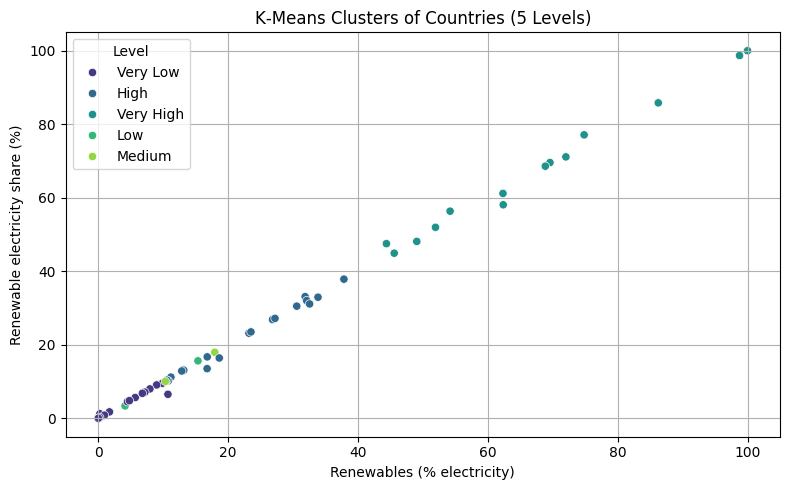

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_country,
    x='Renewables (% electricity)',
    y='Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    hue='Level_Label',
    palette='viridis'
)
plt.title("K‑Means Clusters of Countries (5 Levels)")
plt.xlabel("Renewables (% electricity)")
plt.ylabel("Renewable electricity share (%)")
plt.legend(title="Level")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
for lvl in labels:
    group = df_country[df_country['Level_Label']==lvl]['Country'].sort_values()
    print(f"\n{lvl} Implementation ({len(group)} countries):")
    print(", ".join(group.tolist()))



Very Low Implementation (21 countries):
Algeria, Australia, Belgium, Bulgaria, Cyprus, Hungary, Iraq, Israel, Kuwait, Malaysia, Netherlands, Oman, Poland, Qatar, Saudi Arabia, Singapore, South Africa, Thailand, Trinidad and Tobago, United Arab Emirates, United Kingdom

Low Implementation (2 countries):
Bangladesh, India

Medium Implementation (2 countries):
China, United States

High Implementation (19 countries):
Argentina, Denmark, Finland, France, Germany, Greece, Indonesia, Ireland, Italy, Japan, Luxembourg, Mexico, Morocco, Pakistan, Philippines, Portugal, Romania, Spain, Turkey

Very High Implementation (14 countries):
Austria, Brazil, Canada, Chile, Colombia, Ecuador, Iceland, New Zealand, Norway, Peru, Sri Lanka, Sweden, Switzerland, Vietnam


# AbblomerativeClustering

Silhouette Score: 0.423


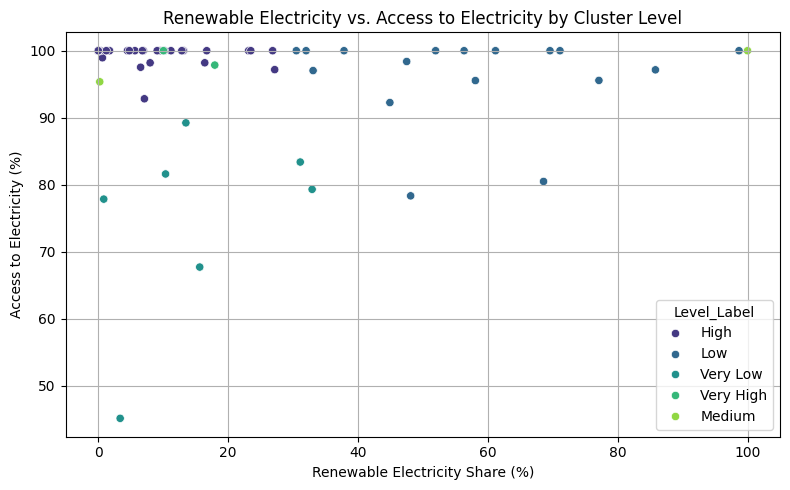


Very Low Implementation (7 countries):
Bangladesh, India, Indonesia, Morocco, Pakistan, Philippines, South Africa

Low Implementation (17 countries):
Argentina, Austria, Brazil, Canada, Chile, Colombia, Ecuador, Finland, New Zealand, Norway, Peru, Portugal, Romania, Sri Lanka, Sweden, Switzerland, Vietnam

Medium Implementation (2 countries):
Iceland, Trinidad and Tobago

High Implementation (30 countries):
Algeria, Australia, Belgium, Bulgaria, Cyprus, Denmark, France, Germany, Greece, Hungary, Iraq, Ireland, Israel, Italy, Japan, Kuwait, Luxembourg, Malaysia, Mexico, Netherlands, Oman, Poland, Qatar, Saudi Arabia, Singapore, Spain, Thailand, Turkey, United Arab Emirates, United Kingdom

Very High Implementation (2 countries):
China, United States


In [24]:
# Load dataset
df = pd.read_csv('final.csv')

# List of features
features = [
    'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
    'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
    'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
    'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
    'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]'
]

# Convert relevant columns to numeric, forcing errors to NaN
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data in selected features
df_cleaned = df.dropna(subset=features)

# Group by country, compute average for each feature
df_country = df_cleaned.groupby('Country')[features].mean().reset_index()

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_country[features])

# Apply Agglomerative Clustering with 5 clusters
agg_clust = AgglomerativeClustering(n_clusters=5)
df_country['Cluster'] = agg_clust.fit_predict(X_scaled)

# Check Silhouette Score
sil_score = silhouette_score(X_scaled, df_country['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

# Sort clusters by renewable electricity share for interpretation
df_country['Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]'] = df_country[
    'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]']

label_map = {
    0: 'Very Low',
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_country['Level_Label'] = df_country['Cluster'].map(label_map)

# Scatter plot to visualize clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_country,
    x='Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    y='Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
    hue='Level_Label',
    palette='viridis'
)
plt.title("Renewable Electricity vs. Access to Electricity by Cluster Level")
plt.xlabel("Renewable Electricity Share (%)")
plt.ylabel("Access to Electricity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# List countries by cluster level
for label in ['Very Low', 'Low', 'Medium', 'High', 'Very High']:
    countries = df_country[df_country['Level_Label'] == label]['Country'].tolist()
    print(f"\n{label} Implementation ({len(countries)} countries):")
    print(', '.join(sorted(countries)))


In [25]:


# Add ISO Alpha-3 country codes dynamically
def get_iso_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

df_country['ISO_Code'] = df_country['Country'].apply(get_iso_code)

# Filter to only countries that successfully got ISO codes (some might not match exactly)
df_mapped = df_country.dropna(subset=['ISO_Code'])

# Plot the choropleth map
fig = px.choropleth(
    df_mapped,
    locations='ISO_Code',
    color='Level_Label',
    hover_name='Country',
    color_discrete_map={
        'Very Low': '#540d6e',
        'Low': '#ee4266',
        'Medium': '#ffd23f',
        'High': '#3bceac',
        'Very High': '#0ead69'
    },
    title='Global Renewable Energy Implementation (Agglomerative Clustering)',
    projection='natural earth'
)

fig.update_layout(legend_title_text='Implementation Level')
fig.show()


# Hybrid Clustering

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score


In [27]:
df = pd.read_csv('final.csv')

features = [
    'Renewables (% electricity)',
    'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
    'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
    'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
    'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
    'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]'
]

# force numeric, drop NaNs
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna(subset=features)


In [28]:
df_country = (
    df_clean
      .groupby('Country')[features]
      .mean()
      .reset_index()
)


In [29]:
X = df_country[features].values
X_scaled = MinMaxScaler().fit_transform(X)


In [30]:
micro = AgglomerativeClustering(n_clusters=50, linkage='ward')
df_country['micro_label'] = micro.fit_predict(X_scaled)


In [31]:
micro_centroids = (
    df_country
      .groupby('micro_label')[features]
      .mean()
      .values
)


In [32]:
# Step 7: cluster the 50 micro‑centroids into 5 “super‑clusters”
km = KMeans(n_clusters=5, random_state=42)
super_labels = km.fit_predict(micro_centroids)   # array length = 50

# Step 8: Map each country to its super‑cluster via its micro_label
# micro_label runs from 0…49, so we can directly index into super_labels
mapping = {micro: super_labels[micro] for micro in range(len(super_labels))}

# Now assign the final cluster to each country
df_country['Cluster'] = df_country['micro_label'].map(mapping)


In [33]:
from sklearn.metrics import silhouette_score

# Now that df_country['Cluster'] exists, this will work:
sil = silhouette_score(X_scaled, df_country['Cluster'])
print("Silhouette Score:", round(sil, 3))


Silhouette Score: -0.017


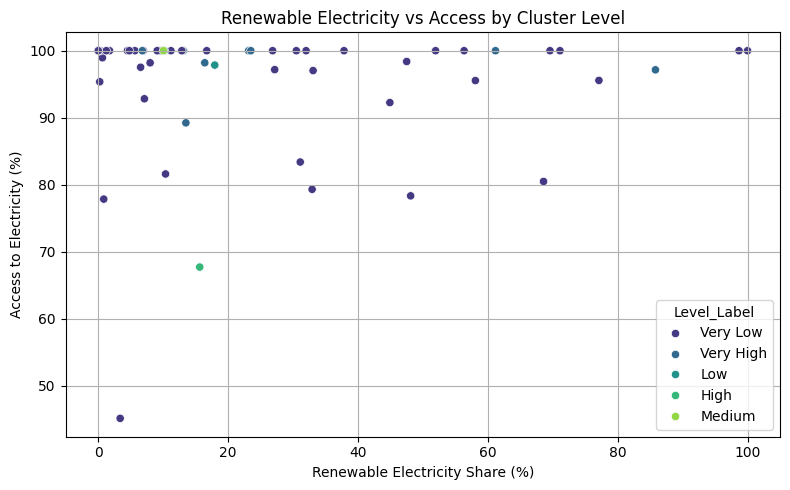

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Map numeric clusters to meaningful labels for readability
label_map = {
    0: 'Very Low',
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df_country['Level_Label'] = df_country['Cluster'].map(label_map)

# Scatter plot: renewable electricity vs access to electricity
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_country,
    x='Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    y='Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
    hue='Level_Label',
    palette='viridis'
)
plt.title("Renewable Electricity vs Access by Cluster Level")
plt.xlabel("Renewable Electricity Share (%)")
plt.ylabel("Access to Electricity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
for label in ['Very Low', 'Low', 'Medium', 'High', 'Very High']:
    countries = df_country[df_country['Level_Label'] == label]['Country'].tolist()
    print(f"\n{label} Implementation ({len(countries)} countries):")
    print(', '.join(sorted(countries)))



Very Low Implementation (45 countries):
Algeria, Argentina, Australia, Austria, Bangladesh, Belgium, Bulgaria, Chile, Colombia, Cyprus, Denmark, Ecuador, Finland, Greece, Hungary, Iceland, Iraq, Ireland, Israel, Kuwait, Luxembourg, Malaysia, Morocco, Netherlands, New Zealand, Norway, Oman, Pakistan, Peru, Philippines, Poland, Portugal, Qatar, Romania, Saudi Arabia, Singapore, South Africa, Sri Lanka, Sweden, Switzerland, Thailand, Trinidad and Tobago, Turkey, United Arab Emirates, Vietnam

Low Implementation (1 countries):
China

Medium Implementation (1 countries):
United States

High Implementation (1 countries):
India

Very High Implementation (10 countries):
Brazil, Canada, France, Germany, Indonesia, Italy, Japan, Mexico, Spain, United Kingdom


In [36]:
cluster_summary = df_country.groupby('Cluster')[features].mean()
print(cluster_summary)


         Renewables (% electricity)  \
Cluster                               
0                         26.028479   
1                         17.964355   
2                         10.357251   
3                         15.371453   
4                         27.463513   

         Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]  \
Cluster                                                                               
0                                                95.220014                            
1                                                97.855902                            
2                                               100.000000                            
3                                                67.702436                            
4                                                98.457758                            

         Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]  \
Cluster       

# K-mean

Silhouette Score: 0.481


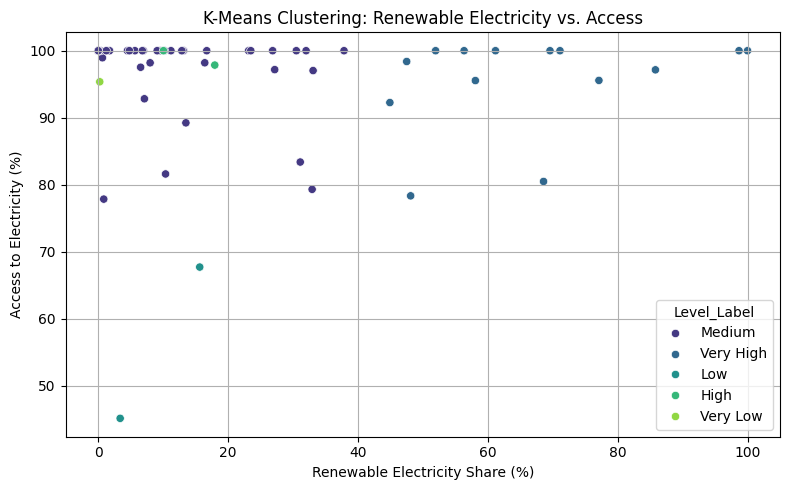


Very Low Implementation (1 countries):
Trinidad and Tobago

Low Implementation (2 countries):
Bangladesh, India

Medium Implementation (39 countries):
Algeria, Argentina, Australia, Belgium, Bulgaria, Cyprus, Denmark, Finland, France, Germany, Greece, Hungary, Indonesia, Iraq, Ireland, Israel, Italy, Japan, Kuwait, Luxembourg, Malaysia, Mexico, Morocco, Netherlands, Oman, Pakistan, Philippines, Poland, Portugal, Qatar, Romania, Saudi Arabia, Singapore, South Africa, Spain, Thailand, Turkey, United Arab Emirates, United Kingdom

High Implementation (2 countries):
China, United States

Very High Implementation (14 countries):
Austria, Brazil, Canada, Chile, Colombia, Ecuador, Iceland, New Zealand, Norway, Peru, Sri Lanka, Sweden, Switzerland, Vietnam


In [44]:
# Load Dataset
df = pd.read_csv('final.csv')

# Selecting parameters
features = [
    'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
    'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
    'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
    'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
    'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]'
]

# Convert all parameters to numeric
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# Group by country
df_country = df_cleaned.groupby('Country')[features].mean().reset_index()

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_country[features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_country['Cluster'] = kmeans.fit_predict(X_scaled)

# Order clusters by average renewable electricity share
cluster_order = df_country.groupby('Cluster')[
    'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]'
].mean().sort_values().index.tolist()

# Map ordered clusters to labels
ordered_labels = {
    cluster_order[i]: label for i, label in enumerate(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
}
df_country['Level_Label'] = df_country['Cluster'].map(ordered_labels)

# Silhouette Score
sil_score = silhouette_score(X_scaled, df_country['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

# Visualizing overall clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_country,
    x='Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    y='Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
    hue='Level_Label',
    palette='viridis'
)
plt.title("K-Means Clustering: Renewable Electricity vs. Access")
plt.xlabel("Renewable Electricity Share (%)")
plt.ylabel("Access to Electricity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print countries in each implementation level
for label in ['Very Low', 'Low', 'Medium', 'High', 'Very High']:
    countries = df_country[df_country['Level_Label'] == label]['Country'].tolist()
    print(f"\n{label} Implementation ({len(countries)} countries):")
    print(', '.join(sorted(countries)))


In [38]:
# Assign ISO codes dynamically
def get_iso_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

df_country['ISO_Code'] = df_country['Country'].apply(get_iso_code)

# Drop countries with no ISO codes (e.g., lookup failures)
df_mapped = df_country.dropna(subset=['ISO_Code'])

# Plot map
fig = px.choropleth(
    df_mapped,
    locations='ISO_Code',
    color='Level_Label',
    hover_name='Country',
    color_discrete_map={
        'Very Low': '#540d6e',
        'Low': '#ee4266',
        'Medium': '#ffd23f',
        'High': '#3bceac',
        'Very High': '#0ead69'
    },
    title='Global Renewable Energy Implementation (K-Means Clustering)',
    projection='natural earth'
)

fig.update_layout(legend_title_text='Implementation Level')
fig.show()
